In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib.font_manager as fm
import platform

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # ÏúàÎèÑÏö∞

plt.rc('axes', unicode_minus=False)  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

In [5]:
df = pd.read_csv('./data/merge_data.csv')
df.head(2)

nickname world_name character_class  character_level  character_exp_rate  \
0       ÏïÑÎç∏       Ïä§Ïπ¥ÎãàÏïÑ              ÏïÑÎç∏              292              47.568   
1       Ìù°Ìòà       Ïä§Ïπ¥ÎãàÏïÑ           Îç∞Î™¨Ïñ¥Î≤§Ï†∏              285              70.911   

    character_date_create  dojang_best_floor  dojang_best_time  popularity  \
0  2020-01-16T00:00+09:00                 99               896        8778   
1  2022-03-30T00:00+09:00                 85               884         595   

    ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†•  ...  ÏÉÅÌÉúÏù¥ÏÉÅ Ï∂îÍ∞Ä Îç∞ÎØ∏ÏßÄ  Î¨¥Í∏∞ ÏàôÎ†®ÎèÑ  Ï∂îÍ∞Ä Í≤ΩÌóòÏπò ÌöçÎìù    Í≥µÍ≤©Î†•    ÎßàÎ†•         Ï†ÑÌà¨Î†•  \
0  373904068  ...         14.0      90      195.0  19129  4232  1352790435   
1  271680490  ...         14.0      90       59.0  14009  3710  1184547868   

   ÏÜåÌôòÏàò ÏßÄÏÜçÏãúÍ∞Ñ Ï¶ùÍ∞Ä  force_sum  force_mean  force_min  
0           10     2080.0       160.0      100.0  
1           10     1950.0       150.0        0.0  

[2 rows x 56 columns]

In [6]:
df.shape

(474, 56)

In [11]:
df.columns

Index(['nickname', 'world_name', 'character_class', 'character_level',
       'character_exp_rate', 'character_date_create', 'dojang_best_floor',
       'dojang_best_time', 'popularity', 'ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†•', 'ÏµúÎåÄ Ïä§ÌÉØÍ≥µÍ≤©Î†•', 'Îç∞ÎØ∏ÏßÄ',
       'Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Îç∞ÎØ∏ÏßÄ', 'ÏµúÏ¢Ö Îç∞ÎØ∏ÏßÄ', 'Î∞©Ïñ¥Ïú® Î¨¥Ïãú', 'ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•†', 'ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ', 'ÏÉÅÌÉúÏù¥ÏÉÅ ÎÇ¥ÏÑ±',
       'Ïä§ÌÉ†Ïä§', 'Î∞©Ïñ¥Î†•', 'Ïù¥ÎèôÏÜçÎèÑ', 'Ï†êÌîÑÎ†•', 'Ïä§ÌÉÄÌè¨Ïä§', 'ÏïÑÏºÄÏù∏Ìè¨Ïä§', 'Ïñ¥ÏÑºÌã±Ìè¨Ïä§', 'STR', 'DEX',
       'INT', 'LUK', 'HP', 'MP', 'AP Î∞∞Î∂Ñ STR', 'AP Î∞∞Î∂Ñ DEX', 'AP Î∞∞Î∂Ñ INT',
       'AP Î∞∞Î∂Ñ LUK', 'AP Î∞∞Î∂Ñ HP', 'AP Î∞∞Î∂Ñ MP', 'ÏïÑÏù¥ÌÖú ÎìúÎ°≠Î•†', 'Î©îÏÜå ÌöçÎìùÎüâ', 'Î≤ÑÌîÑ ÏßÄÏÜçÏãúÍ∞Ñ',
       'Í≥µÍ≤© ÏÜçÎèÑ', 'ÏùºÎ∞ò Î™¨Ïä§ÌÑ∞ Îç∞ÎØ∏ÏßÄ', 'Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ Í∞êÏÜå (Ï¥à)', 'Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ Í∞êÏÜå (%)',
       'Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎØ∏Ï†ÅÏö©', 'ÏÜçÏÑ± ÎÇ¥ÏÑ± Î¨¥Ïãú', 'ÏÉÅÌÉúÏù¥ÏÉÅ Ï∂îÍ∞Ä Îç∞ÎØ∏ÏßÄ', 'Î¨¥Í∏∞ ÏàôÎ†®ÎèÑ', 'Ï∂îÍ∞Ä Í≤ΩÌó

## 1. ÏßÅÏóÖÎ≥Ñ ÌèâÍ∑† ÎèÑÏû•Ï∏µÏàò Î∂ÑÏÑù

- Í∞Å ÏßÅÏóÖÎ≥ÑÎ°ú ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàòÏùò ÌèâÍ∑†Í∞íÍ≥º ÌëúÏ§ÄÌé∏Ï∞® ÎπÑÍµê Î∞è ÏãúÍ∞ÅÌôî

C:\Users\user\AppData\Local\Temp\ipykernel_15652\3135765124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_stats, x='mean', y='character_class', palette='Blues_d')


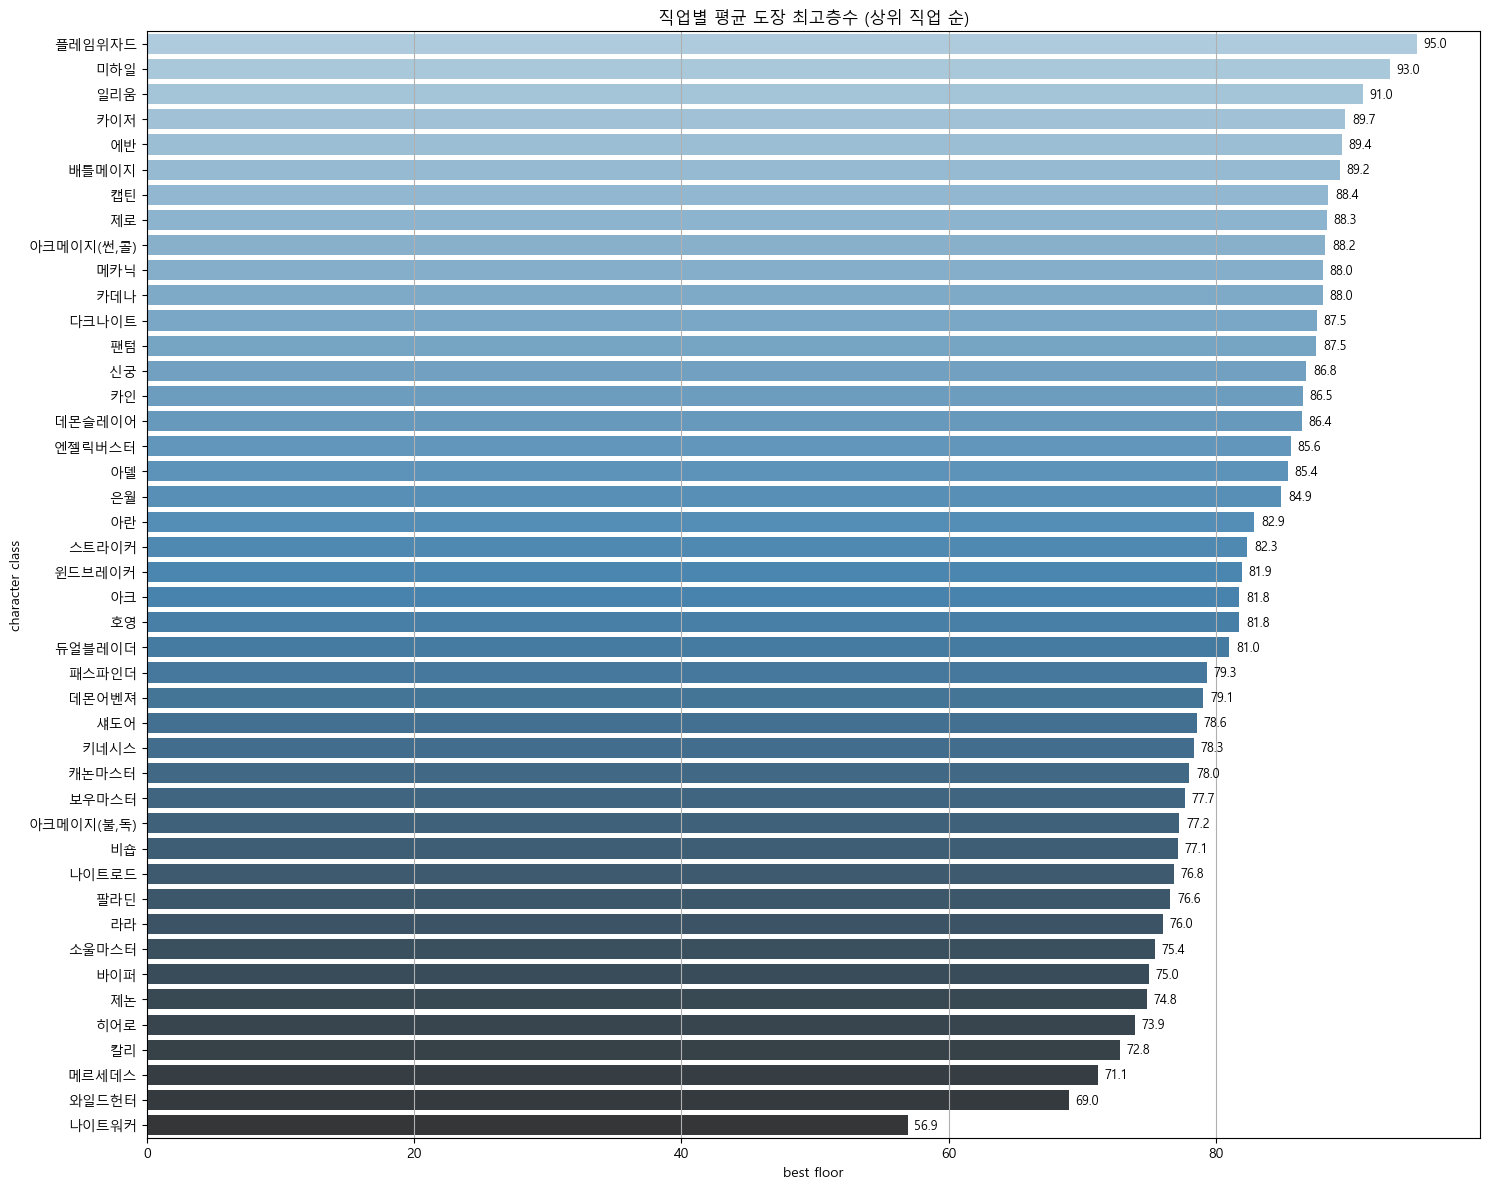

In [15]:
# ÏßÅÏóÖÎ≥Ñ ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞® ÎèÑÏû•Ï∏µÏàò Í≥ÑÏÇ∞
job_stats = df.groupby('character_class')['dojang_best_floor'].agg(['mean','std','count']).sort_values('mean',ascending=False).reset_index()

plt.figure(figsize=(15,12))
sns.barplot(data=job_stats, x='mean', y='character_class', palette='Blues_d')

for i, (mean, name) in enumerate(zip(job_stats['mean'], job_stats['character_class'])):
    plt.text(mean + 0.5, i, f'{mean:.1f}', va='center', fontsize=9 )

plt.xlabel('best floor')
plt.ylabel('character class')
plt.title('ÏßÅÏóÖÎ≥Ñ ÌèâÍ∑† ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàò (ÏÉÅÏúÑ ÏßÅÏóÖ Ïàú)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## 2. Ï†ÑÌà¨Î†• vs ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàò ÏÉÅÍ¥ÄÎ∂ÑÏÑù

- Ï†ÑÌà¨Î†•Í≥º ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàòÏóê ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïòÎäîÍ∞Ä???Ïóê ÎåÄÌïú Í∂ÅÍ∏àÏ¶ù

corr : -0.00, p-value : 0.93


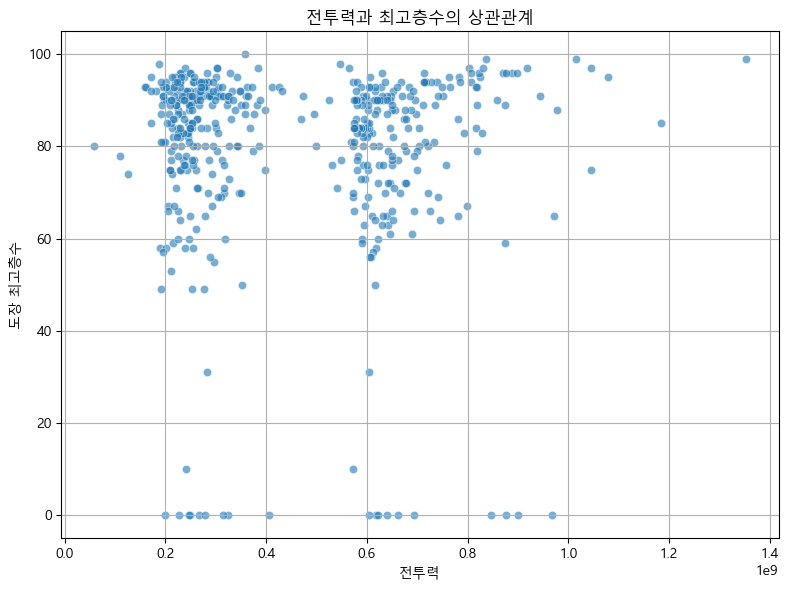

In [16]:
# spearman corr
from scipy.stats import spearmanr

corr, p = spearmanr(df['Ï†ÑÌà¨Î†•'], df['dojang_best_floor'])
print(f'corr : {corr:.2f}, p-value : {p:.2f}')

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Ï†ÑÌà¨Î†•', y='dojang_best_floor', alpha=0.6)
plt.title(f'Ï†ÑÌà¨Î†•Í≥º ÏµúÍ≥†Ï∏µÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
plt.xlabel('Ï†ÑÌà¨Î†•')
plt.ylabel('ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàò')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df['dojang_best_floor'].max(), df['Ï†ÑÌà¨Î†•'].max()

(100, 1352790435)

- Í∑∏Î¶ºÏù¥ Î≥ÑÎ°ú Ïù¥ÏÅòÏßÄ ÏïäÏùÄ Ïù¥Ïú†Îäî Ï†ÑÌà¨Î†•ÏùÄ ÏñµÎã®ÏúÑÍ∞Ä ÎÑòÏñ¥Í∞ÄÎäî Î∞òÎ©¥ Ï∏µÏàòÎäî Ï†úÏùº ÎÜíÏïÑÎ¥êÏïº 100Ï∏µÏù¥Îã§.
- Ï†ÑÌà¨Î†•Ïóê logÎ≥ÄÌôòÏùÑ ÌÜµÌï¥ Îëê Î≥ÄÏàòÎì§ ÏÇ¨Ïù¥Ïùò Ïä§ÏºÄÏùºÏùÑ ÎßûÏ∂îÏñ¥ÏÑú Îã§Ïãú Í∑∏Î†§Î≥¥Ïûê

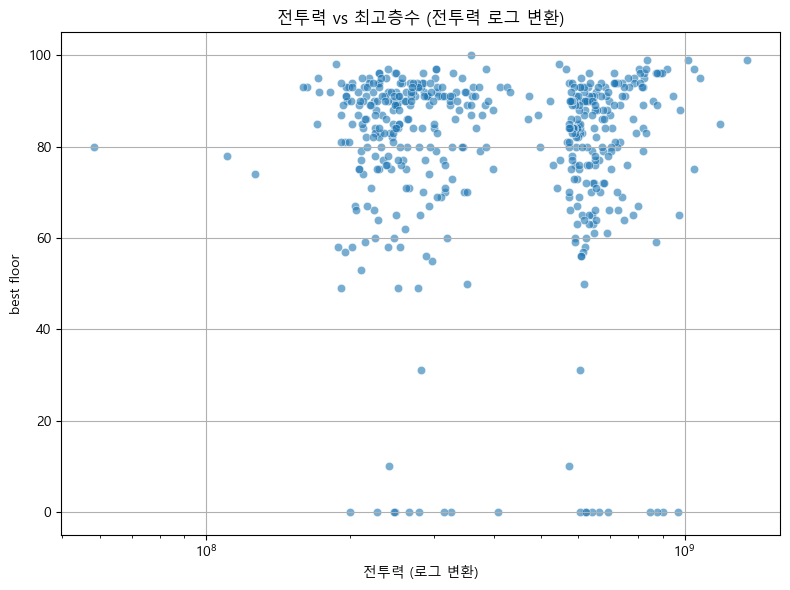

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Ï†ÑÌà¨Î†•', y='dojang_best_floor', alpha=0.6)
plt.xscale('log') # Ï†ÑÌà¨Î†•Ïóê log Î≥ÄÌôò 
plt.title('Ï†ÑÌà¨Î†• vs ÏµúÍ≥†Ï∏µÏàò (Ï†ÑÌà¨Î†• Î°úÍ∑∏ Î≥ÄÌôò)')
plt.xlabel('Ï†ÑÌà¨Î†• (Î°úÍ∑∏ Î≥ÄÌôò)')
plt.ylabel('best floor')
plt.grid(True)
plt.tight_layout()
plt.show()

- Ïó¨Ï†ÑÌûà Ìï¥ÏÑùÏùÄ Í∞ÄÎä•ÏùÄ ÌïòÍ≤†ÏßÄÎßå Ìï¥Îãπ Í∑∏Î¶ºÏù¥ ÏßÅÍ¥ÄÏ†ÅÏù∏Í∞ÄÏóê ÎåÄÌï¥ÏÑúÎäî Ïûò Î™®Î•¥Í≤†Ïùå
- Íµ¨Í∞ÑÎ≥Ñ Î∞ïÏä§ÌîåÎ°Ø, kdeplot, hexbinÏùÑ Í∑∏Î†§Î≥¥Î©¥ÏÑú Î∞ÄÎèÑ Í∏∞Î∞òÏúºÎ°ú ÌôïÏù∏Ìï¥Î≥¥Í∏∞

C:\Users\user\AppData\Local\Temp\ipykernel_15652\2789758067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Ï†ÑÌà¨Î†•_Íµ¨Í∞Ñ", y="dojang_best_floor", palette="Set3")


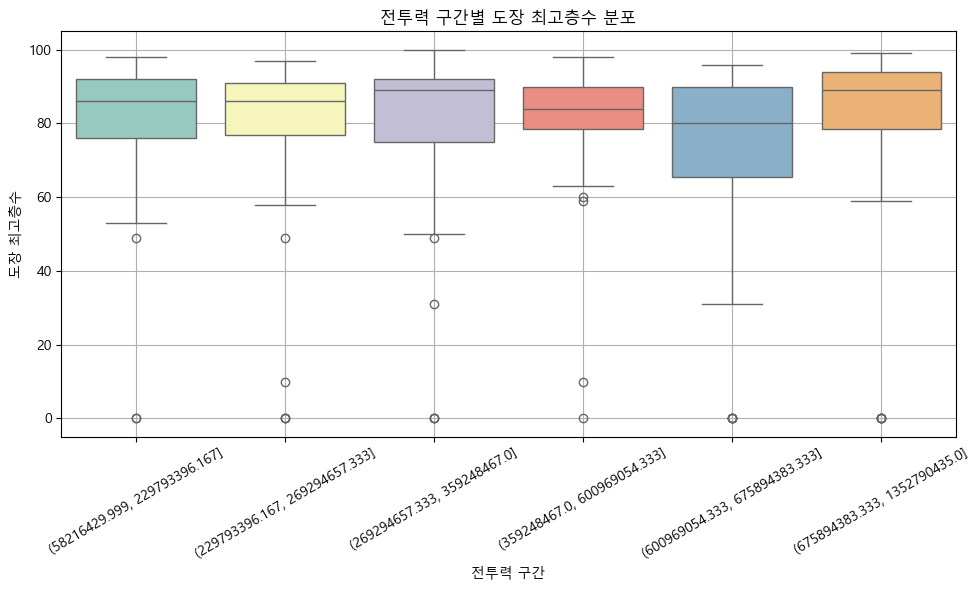

In [29]:
# Ï†ÑÌà¨Î†•ÏùÑ Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎàÑÍ∏∞ (6Í∞ú Î∂ÑÏúÑÏàò)
df["Ï†ÑÌà¨Î†•_Íµ¨Í∞Ñ"] = pd.qcut(df["Ï†ÑÌà¨Î†•"], q=6, duplicates='drop')

# boxplot ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Ï†ÑÌà¨Î†•_Íµ¨Í∞Ñ", y="dojang_best_floor", palette="Set3")
plt.title("Ï†ÑÌà¨Î†• Íµ¨Í∞ÑÎ≥Ñ ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàò Î∂ÑÌè¨")
plt.xlabel("Ï†ÑÌà¨Î†• Íµ¨Í∞Ñ")
plt.ylabel("ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàò")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

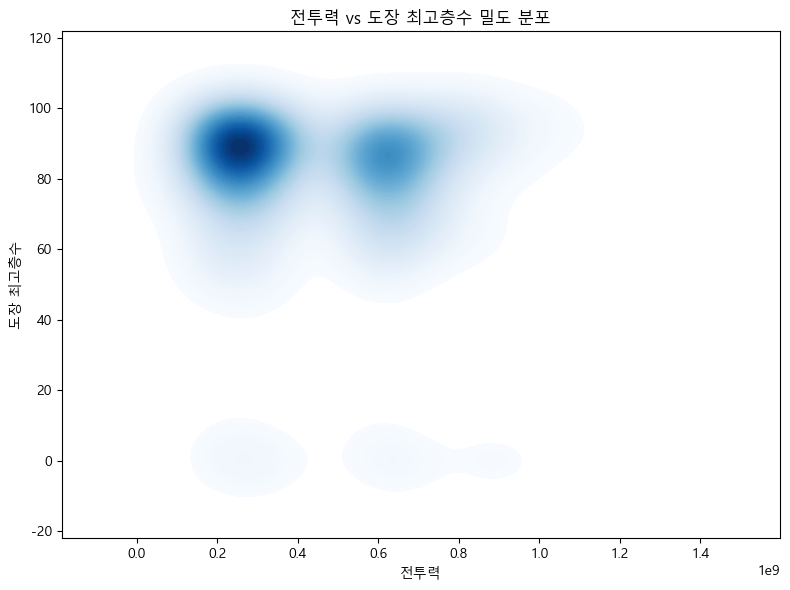

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df, x="Ï†ÑÌà¨Î†•", y="dojang_best_floor",
    fill=True, cmap="Blues", thresh=0.05, levels=100
)
plt.title("Ï†ÑÌà¨Î†• vs ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàò Î∞ÄÎèÑ Î∂ÑÌè¨")
plt.xlabel("Ï†ÑÌà¨Î†•")
plt.ylabel("ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàò")
plt.tight_layout()
plt.show()


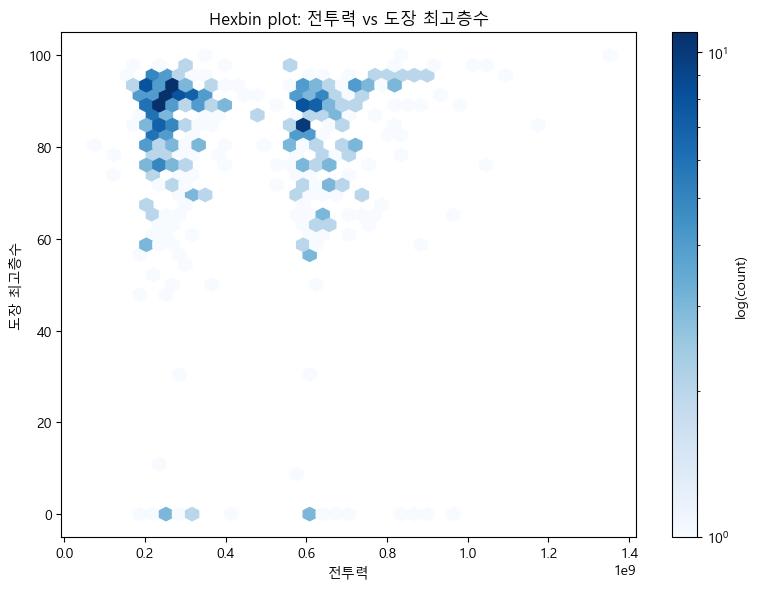

In [27]:
plt.figure(figsize=(8, 6))
plt.hexbin(df["Ï†ÑÌà¨Î†•"], df["dojang_best_floor"], gridsize=40, cmap='Blues', bins='log')
plt.colorbar(label='log(count)')
plt.xlabel("Ï†ÑÌà¨Î†•")
plt.ylabel("ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàò")
plt.title("Hexbin plot: Ï†ÑÌà¨Î†• vs ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàò")
plt.tight_layout()
plt.show()

## 3. Î≤ÑÌîÑ Ïä§ÌÉØ(ÌÅ¨Ìôï, Î≤ûÏßÄ Îì±)Í≥º ÎèÑÏû• Ï∏µÏàòÏôÄÏùò Í¥ÄÍ≥Ñ

C:\Users\user\AppData\Local\Temp\ipykernel_15652\134697937.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=buff_corr_df, x="spearman_corr", y="feature", palette='Blues_r')


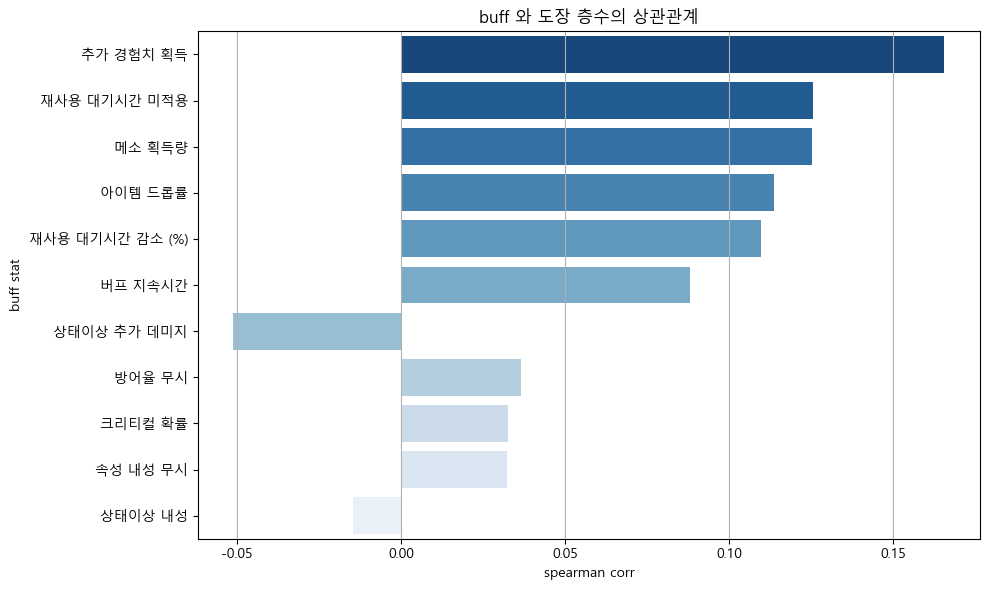

In [30]:
# Î≤ÑÌîÑ Í¥ÄÎ†® Ïª¨Îüº Î™©Î°ù
buff_cols = [
    'Î∞©Ïñ¥Ïú® Î¨¥Ïãú', 'ÌÅ¨Î¶¨Ìã∞Ïª¨ ÌôïÎ•†', 'ÏÉÅÌÉúÏù¥ÏÉÅ ÎÇ¥ÏÑ±',
    'Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ Í∞êÏÜå (%)', 'Ïû¨ÏÇ¨Ïö© ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎØ∏Ï†ÅÏö©',
    'ÏÜçÏÑ± ÎÇ¥ÏÑ± Î¨¥Ïãú', 'ÏÉÅÌÉúÏù¥ÏÉÅ Ï∂îÍ∞Ä Îç∞ÎØ∏ÏßÄ', 'Ï∂îÍ∞Ä Í≤ΩÌóòÏπò ÌöçÎìù',
    'ÏïÑÏù¥ÌÖú ÎìúÎ°≠Î•†', 'Î©îÏÜå ÌöçÎìùÎüâ', 'Î≤ÑÌîÑ ÏßÄÏÜçÏãúÍ∞Ñ'
]

# buff corr
corr_list = []

for col in buff_cols:
    corr, p = spearmanr(df[col], df['dojang_best_floor'])
    corr_list.append({
        "feature" : col,
        "spearman_corr" : corr,
        "abs_corr":abs(corr)
    })

# dataframe Ï†ÄÏû• ÌõÑ ÏãúÍ∞ÅÌôî ÌïòÍ∏∞
buff_corr_df = pd.DataFrame(corr_list).sort_values("abs_corr", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=buff_corr_df, x="spearman_corr", y="feature", palette='Blues_r')
plt.title('buff ÏôÄ ÎèÑÏû• Ï∏µÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
plt.xlabel('spearman corr')
plt.ylabel('buff stat')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

- Ïù¥Í±¥ Ï¢Ä ÏùòÏô∏Ïùò Í≤∞Í≥ºÏù∏ÎìØ
- Ïñ¥Ïß∏ÏÑú Í≤ΩÌóòÏπò ÌöçÎìùÏù¥Îûë, Î©îÏÜå, ÏïÑÏù¥ÌÖú Í¥ÄÎ†® ÏßÄÌëúÍ∞Ä ÏÉÅÏúÑÍ∂åÏóê ÏÜçÌïòÎäîÏßÄ Ïù¥Ìï¥Í∞Ä ÏïàÎê®
- Ï¢Ä Îçî ÎúØÏñ¥Î¥êÏÑú ÌôïÏù∏Ìï¥Î¥êÏïº Ìï†ÎìØ
    - ÌûàÌä∏ÎßµÏùÑ ÌÜµÌï¥ Ï†ÑÏ≤¥ correlation ÌôïÏù∏
    - ÌèâÍ∑† ÎèÑÏû•Ï∏µÏàò ÎπÑÍµêÌï¥ÏÑú ÌôïÏù∏

<Axes: >

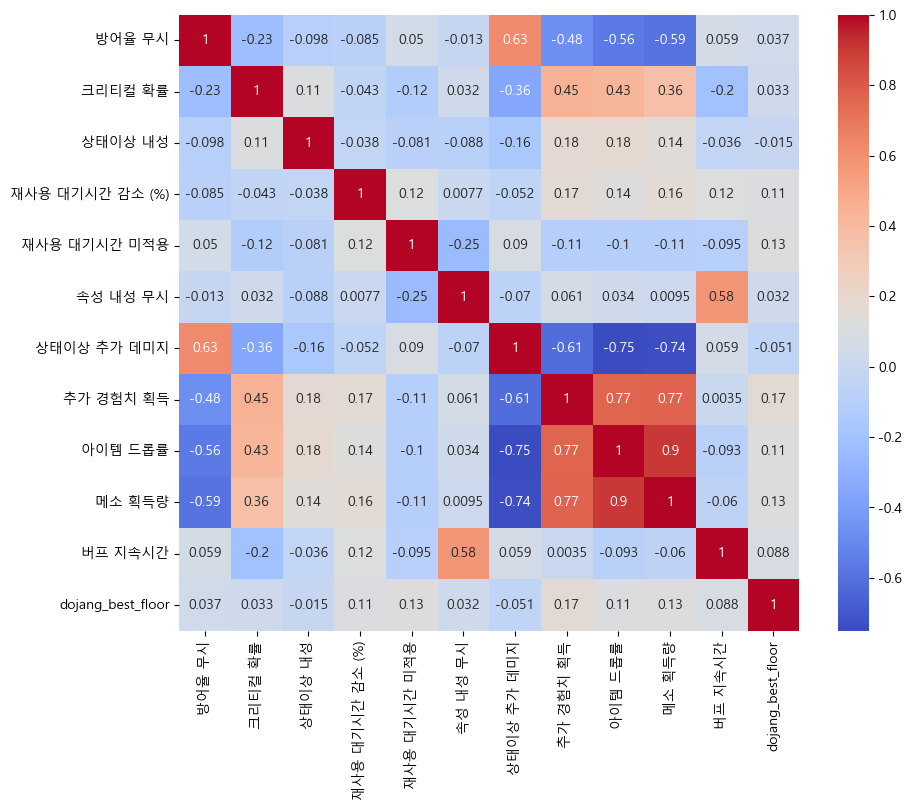

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df[buff_cols + ['dojang_best_floor']].corr(method='spearman'), annot=True, cmap='coolwarm')

- Ìù†...ÌùêÏùå........ÏùºÎã® Îã§ÏùåÎã®Í≥ÑÎ°ú Í∞ÄÍ≥† ÎÇòÏ§ëÏóê Î≥¥Ïûê

## 4. Í≥µÍ≤©Ïä§ÌÉØ Í¥ÄÎ†®

- ÏñòÎÑ§Îì§ÏùÄ Ï¢Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏÉùÍ∞ÅÌïòÎäîÎåÄÎ°ú ÎÇòÏò§Í≤†ÏßÄ

C:\Users\user\AppData\Local\Temp\ipykernel_15652\3505061321.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=atk_corr_df, x='spearman_corr', y='feature', palette='rocket')


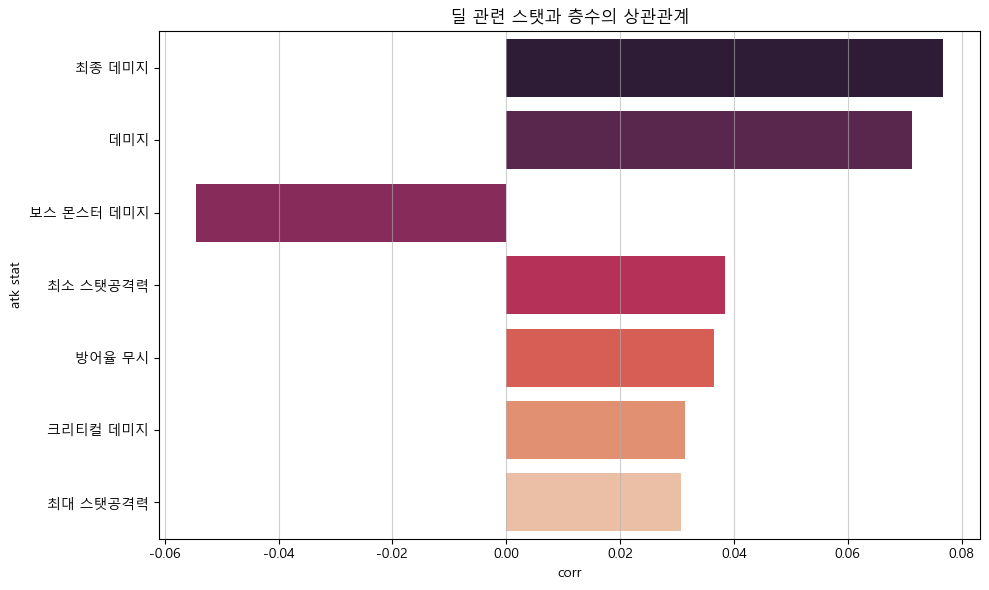

In [47]:
atk_cols = [
    "ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†•", "ÏµúÎåÄ Ïä§ÌÉØÍ≥µÍ≤©Î†•", 
    "Îç∞ÎØ∏ÏßÄ", "Î≥¥Ïä§ Î™¨Ïä§ÌÑ∞ Îç∞ÎØ∏ÏßÄ", "ÏµúÏ¢Ö Îç∞ÎØ∏ÏßÄ", "ÌÅ¨Î¶¨Ìã∞Ïª¨ Îç∞ÎØ∏ÏßÄ",
    "Î∞©Ïñ¥Ïú® Î¨¥Ïãú" 
]

# atk corr
atk_corr_list = []

for col in atk_cols:
    corr, p = spearmanr(df[col], df['dojang_best_floor'])
    atk_corr_list.append({
        'feature' : col,
        'spearman_corr' : corr,
        'abs_corr' : abs(corr)
    })

atk_corr_df = pd.DataFrame(atk_corr_list).sort_values(by='abs_corr', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=atk_corr_df, x='spearman_corr', y='feature', palette='rocket')
plt.title('Îîú Í¥ÄÎ†® Ïä§ÌÉØÍ≥º Ï∏µÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
plt.xlabel('corr')
plt.ylabel('atk stat')
plt.grid(axis='x', alpha=0.6)
plt.tight_layout()
plt.show()

<Axes: >

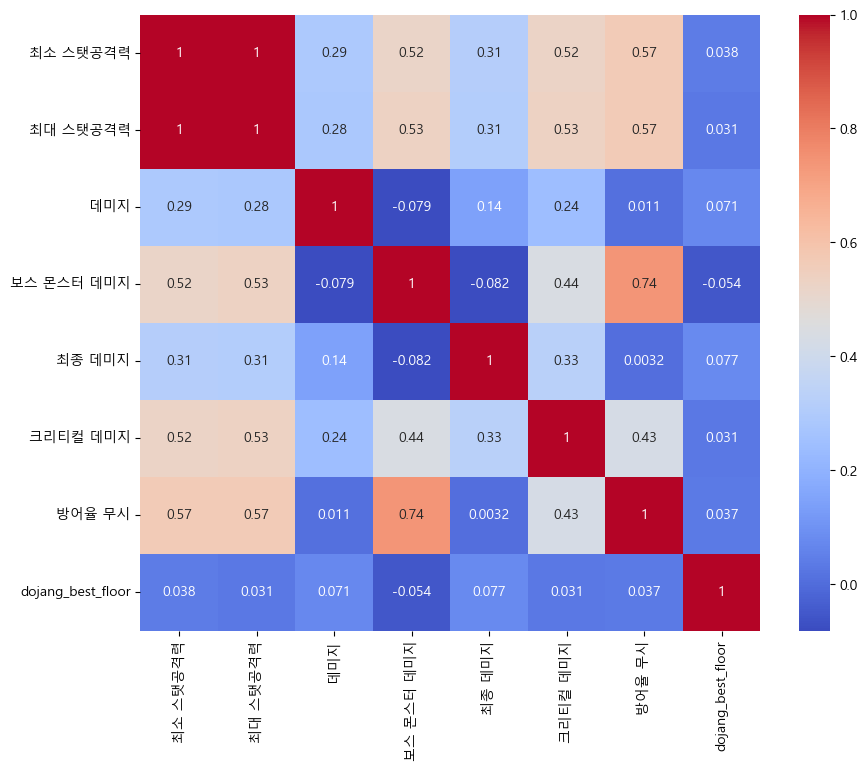

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df[atk_cols + ['dojang_best_floor']].corr(method='spearman'), annot=True, cmap='coolwarm')

- ÏïÑÎ¨¥ÎûòÎèÑ apiÏùò Ïä§ÌÉØÏ†ïÎ≥¥Îäî Ï∂îÏ∂úÌï†Îïå ÎãπÏãúÏùò Ï∫êÎ¶≠ÌÑ∞Ïùò Ï†ïÎ≥¥Îã§.
- ÌèâÏÜåÏóêÎäî Ïú†Ï†ÄÎì§Ïù¥ ÏÇ¨ÎÉ•ÏùÑ Ìï† Í≤É.
- Î¨¥Î¶âÎèÑÏû•Í∞ôÏùÄ Í≤ΩÏö∞Ïóî Î≥¥Ïä§Î•º ÏÇ¨ÎÉ•ÌïòÍ∏∞ ÏúÑÌïú statÏùÑ ÏÑ∏ÌåÖÌïòÏßÑ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê ÏúÑÏôÄ Í∞ôÏùÄ ÏàòÏπòÍ∞Ä ÎÇòÏò§Îäî ÎìØ Ìïú ÎäêÎÇåÏù¥Îã§.

- **<span style="color:orange">Î∂ÑÏÑù Î∞©Ìñ•ÏùÑ Ïä§ÌÉØÎ≥¥Îã§Îäî Ìö®Ïú®ÏÑ±Ïù¥ Ï¢ãÏùÄ ÏßÅÏóÖÏùÑ Ï∞æÏïÑÎ≥¥Í∏∞</span>**

------------

## 1. Î†àÎ≤® ÎåÄÎπÑ ÎèÑÏû• ÏÑ±Îä• Î∂ÑÏÑù

- ÎèÑÏû• Ï∏µÏàò / Ï∫êÎ¶≠ÌÑ∞ Î†àÎ≤® Í∞íÏùÑ ÌÜµÌï¥ Î†àÎ≤® ÎåÄÎπÑ Ìö®Ïú®Ï†ÅÏù∏ Ï∫êÎ¶≠ÌÑ∞Î•º Ï∞æÏùå
- Ïñ¥Îñ§ ÏßÅÏóÖÏùò Ìö®Ïú®Ïù¥ Ï¢ãÏùÄÏßÄ ÎπÑÍµê Ìï¥Î≥¥Í∏∞

C:\Users\user\AppData\Local\Temp\ipykernel_15652\3300286686.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='character_class', y='level_efficiency', palette='Blues_r')


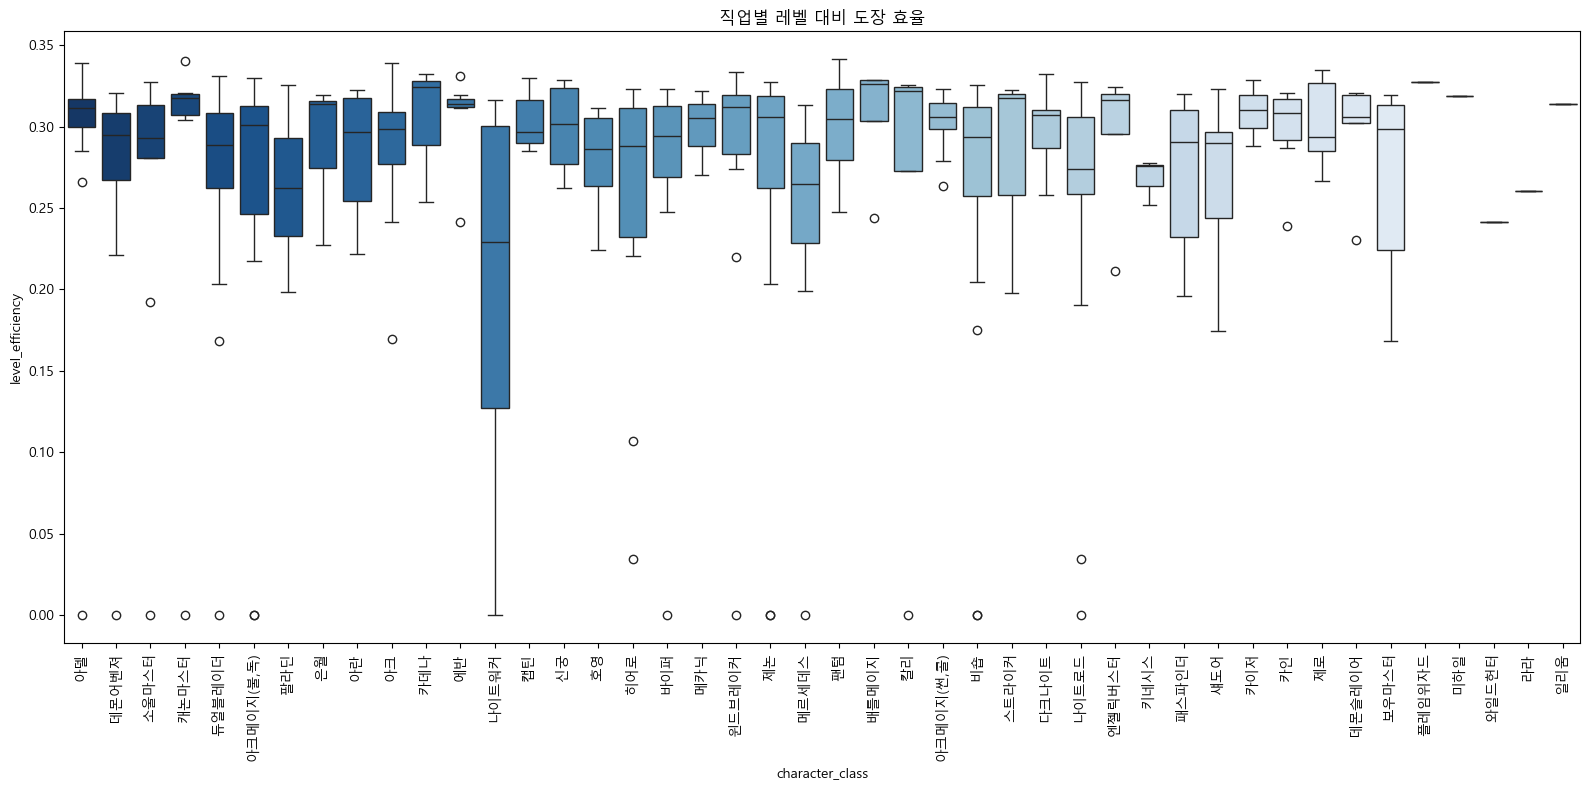

In [62]:
# Î†àÎ≤® ÎåÄÎπÑ Ìö®Ïú® ÏßÄÌëú
df['level_efficiency'] = df['dojang_best_floor'] / df['character_level']

# ÏßÅÏóÖÎ≥Ñ ÌèâÍ∑† Î∞è Î∂ÑÏÇ∞
job_efficiency = df.groupby('character_class')['level_efficiency'].agg(['mean','std','count']).sort_values(by='mean', ascending=False)

# ÏÉÅÏúÑ 5% Ï∫êÎ¶≠
threshold = df['level_efficiency'] .quantile(0.95)
top_eff_df = df[df['level_efficiency'] >= threshold]

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='character_class', y='level_efficiency', palette='Blues_r')
plt.xticks(rotation=90)
plt.title('ÏßÅÏóÖÎ≥Ñ Î†àÎ≤® ÎåÄÎπÑ ÎèÑÏû• Ìö®Ïú®')
plt.tight_layout()
plt.show()

# üìä ÏßÅÏóÖÎ≥Ñ Î†àÎ≤® ÎåÄÎπÑ ÎèÑÏû• Ìö®Ïú® Î∂ÑÏÑù (`level_efficiency` Í∏∞Ï§Ä)

ÎèÑÏû• ÏµúÍ≥†Ï∏µ(`dojang_best_floor`)ÏùÑ Ï∫êÎ¶≠ÌÑ∞ Î†àÎ≤®(`character_level`)Î°ú ÎÇòÎàà `level_efficiency`Î•º Í∏∞Ï§ÄÏúºÎ°ú,
Í∞Å ÏßÅÏóÖÏù¥ ÎèôÏùº Î†àÎ≤® ÎåÄÎπÑ ÎèÑÏû•ÏóêÏÑú ÏñºÎßàÎÇò ÎÜíÏùÄ ÏÑ±Í≥ºÎ•º Î≥¥Ïù¥ÎäîÏßÄÎ•º ÏãúÍ∞ÅÌôîÌï®.  

---

## ü•á Ìö®Ïú® ÏÉÅÏúÑÍ∂å (Ï§ëÏïôÍ∞í Í∏∞Ï§Ä)

| ÏßÅÏóÖ | Î∂ÑÏÑù |
|------|------|
| **Ïπ¥Ïù¥Ï†Ä** | Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞ÄÏû• ÎÜíÏùÄ Ï§ëÏïôÍ∞íÏùÑ Í∏∞Î°ùÌïòÎ©∞, Î∂ÑÏÇ∞ÎèÑ ÏïàÏ†ïÏ†Å. Îß§Ïö∞ Ìö®Ïú®Ï†ÅÏù∏ ÏßÅÏóÖ. |
| **ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Ïç¨,ÏΩú)** | ÏÉÅÏúÑ 25% Ïù¥ÏÉÅÏù¥ Îß§Ïö∞ Îõ∞Ïñ¥ÎÇú Ìö®Ïú®ÏùÑ Î≥¥ÏûÑ. Í∑†ÏùºÌïú ÏÑ±Îä•. |
| **Ïπ¥Ïù∏** | Ï§ëÏïôÍ∞íÏù¥ ÎÜíÍ≥†, ÏÉÅÏúÑ ÌçºÌè¨Î®ºÏä§ Íµ¨Í∞ÑÏù¥ ÎÑìÍ≤å Î∂ÑÌè¨. |
| **ÎπÑÏàç** | IQRÏù¥ Ï¢ÅÍ≥† Ïù¥ÏÉÅÏπòÍ∞Ä Ï†ÅÏñ¥, Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏïàÏ†ïÏ†ÅÏù¥Í≥† ÎÜíÏùÄ Ìö®Ïú®. |

---

## üëç Ï§ëÏÉÅÏúÑÍ∂å

| ÏßÅÏóÖ | Î∂ÑÏÑù |
|------|------|
| **ÌåîÎùºÎîò** | Ìö®Ïú®Ïù¥ ÎÜíÏúºÎ©∞, ÏÉÅÏúÑ Î∂ÑÌè¨ÎèÑ ÏïàÏ†ïÏ†Å. |
| **ÌûàÏñ¥Î°ú** | Ï§ëÏïôÍ∞íÍ≥º Î∂ÑÏÇ∞ Î™®Îëê Ï§ÄÏàòÌïú ÏßÅÏóÖ. |
| **ÏÜåÏö∏ÎßàÏä§ÌÑ∞** | Í≥†Î•∏ Î∂ÑÌè¨ÏôÄ Ï§ÄÏàòÌïú ÌèâÍ∑† Ìö®Ïú®. |
| **ÏúàÎìúÎ∏åÎ†àÏù¥Ïª§** | Îã§ÏÜå Î∂ÑÏÇ∞ÏùÄ ÏûàÏßÄÎßå Ìö®Ïú®ÏùÄ ÏÉÅÏúÑ ÏàòÏ§Ä. |
| **ÏïÑÌÅ¨** | Î∂ÑÏÇ∞Ïù¥ ÌÅ¨ÏßÄÎßå ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÎÜíÏùÄ Ìö®Ïú®ÏùÑ Í∏∞Î°ù. |
| **Ï†úÎ°ú** | Ï§ëÏïôÍ∞íÏù¥ ÎÜíÍ≥† ÏÉÅÏúÑÍ∂åÍ≥º Ïú†ÏÇ¨Ìïú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ. |

---

## ‚öñÔ∏è ÌèâÍ∑† ÏàòÏ§Ä

| ÏßÅÏóÖ | Î∂ÑÏÑù |
|------|------|
| **ÎìÄÏñºÎ∏îÎ†àÏù¥Îçî**, **Îç∞Î™¨Ïñ¥Î≤§Ï†∏**, **ÏïÑÎç∏**, **ÏÑÄÎèÑÏñ¥**, **Î≥¥Ïö∞ÎßàÏä§ÌÑ∞**, **Ìå®Ïä§ÌååÏù∏Îçî**, **ÎÇòÏù¥Ìä∏Î°úÎìú** Îì± | Ï§ëÏïôÍ∞í Í∏∞Ï§ÄÏúºÎ°ú ÌèâÍ∑† ÏàòÏ§ÄÏù¥Î©∞, ÏùºÎ∂Ä ÏßÅÏóÖÏùÄ Î∂ÑÏÇ∞Ïù¥ ÌÅ∞ Ìé∏. |

---

## üìâ Ìö®Ïú® ÌïòÏúÑÍ∂å

| ÏßÅÏóÖ | Î∂ÑÏÑù |
|------|------|
| **ÎÇòÏù¥Ìä∏ÏõåÏª§** | Ï§ëÏïôÍ∞íÏù¥ Îß§Ïö∞ ÎÇÆÍ≥† Î∂ÑÏÇ∞ÎèÑ ÌÅº. ÏµúÌïòÏúÑÍ∂å ÏßÅÏóÖ Ï§ë ÌïòÎÇò. |
| **ÏóêÎ∞ò** | ÏùºÎ∂Ä Ìö®Ïú® Ï¢ãÏùÄ Ïú†Ï†ÄÎèÑ Ï°¥Ïû¨ÌïòÎÇò, Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ ÌçºÌè¨Î®ºÏä§. |
| **Ï†úÎÖº**, **Î©îÏπ¥Îãâ**, **Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥** | ÎèÑÏû• Ìö®Ïú®Ïù¥ ÎÇÆÍ≥† ÏïàÏ†ïÏÑ±ÎèÑ Î∂ÄÏ°±Ìïú ÏßÅÏóÖÍµ∞. |

---

## ‚ùó ÏÉòÌîå Ïàò Ï†ÅÏùå / ÌäπÏù¥Í∞í Ï£ºÏùò

| ÏßÅÏóÖ | Î∂ÑÏÑù |
|------|------|
| **ÎùºÎùº**, **ÏùºÎ¶¨ÏõÄ** | Í∑πÎã®Ï†ÅÏúºÎ°ú ÎÜíÏùÄ Ìö®Ïú®ÏùÑ Í∏∞Î°ùÌñàÏßÄÎßå, Ï†ÑÏ≤¥ ÏÉòÌîå ÏàòÍ∞Ä Ï†ÅÏñ¥ Ìï¥ÏÑùÏóê Ï£ºÏùò ÌïÑÏöî. |
| **Î£®ÎØ∏ÎÑàÏä§** | Ìö®Ïú®ÏùÄ ÎÇÆÏùÄ Ìé∏Ïù¥Î©∞, Ïù¥ÏÉÅÏπò Ï°¥Ïû¨. |
| **ÌîåÎ†àÏûÑÏúÑÏûêÎìú**, **ÎØ∏ÌïòÏùº**, **Ïπ¥Îç∞ÎÇò** | ÎÇÆÏùÄ Ìö®Ïú®Í≥º ÌÅ∞ Î∂ÑÏÇ∞ÏùÑ Î≥¥Ïù¥Îäî ÏßÅÏóÖÍµ∞. ÏÉòÌîåÏù¥ ÎßéÏßÄ ÏïäÏïÑ Îã®Ï†ïÏùÄ Ïñ¥Î†§ÏõÄ. |

---

## üîç ÏöîÏïΩ Ï†ïÎ¶¨

- ‚úÖ **Í∞ÄÏû• Ìö®Ïú®Ï†ÅÏù∏ ÏßÅÏóÖ**: `Ïπ¥Ïù¥Ï†Ä`, `ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Ïç¨,ÏΩú)`, `Ïπ¥Ïù∏`, `ÎπÑÏàç`
- ‚ö†Ô∏è **Ï£ºÏùòÍ∞Ä ÌïÑÏöîÌïú ÏßÅÏóÖ**: `ÎÇòÏù¥Ìä∏ÏõåÏª§`, `Ï†úÎÖº`, `Î©îÏπ¥Îãâ`, `ÏóêÎ∞ò`
- ‚ùï **ÏÉòÌîå Ïàò Ï†ÅÏùå**: `ÎØ∏ÌïòÏùº`, `ÏùºÎ¶¨ÏõÄ`, `ÎùºÎùº` ÏùÄ Í∑∏ÎÉ• Ïù∏Í∏∞Í∞Ä ÏóÜÎäîÎìØ

---

## 2. ÏµúÏÜå Ïä§ÌÉØ Í≥µÍ≤©Î†• ÎåÄÎπÑ ÎèÑÏû• Ìö®Ïú®

- ÏµúÏÜå Ïä§ÌÉØÎåÄÎπÑ ÎèÑÏû•Ìö®Ïú®Ïù¥ Í∞ÄÏû• Ïûò ÎÇòÏò§Îäî ÏßÅÏóÖ Ï∞æÏïÑÎ≥¥Í∏∞

- ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†• ÌÜµÍ≥Ñ ÏöîÏïΩÌëú

| ÌÜµÍ≥Ñ ÏßÄÌëú | Í∞í          |
|-----------|-------------|
| Count     | 474         |
| Mean      | 154,113,190 |
| Std       | 81,674,624  |
| Min       | 1           |
| 25%       | 97,361,309  |
| 50%       | 137,934,481 |
| 75%       | 188,806,437 |
| Max       | 825,396,059 |

- **<span style="color:orange">quantile 25% Ïù¥ÏÉÅ</span>** Ïù∏ Îç∞Ïù¥ÌÑ∞Îßå Îì§Í≥† ÏßÑÌñâ
- outlierÍ∞Ä ÌÅ∞ ÏßÅÏóÖÍµ∞ÏùÄ ÎèÑÏû•Ï∏µÏàòÏóê ÎåÄÌïú ÏöïÏã¨Ïù¥ ÌÅ¨ÏßÄ  ÏïäÏùÑÍ≤ÉÏúºÎ°ú ÌåêÎã®

In [71]:
df['ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†•'].describe().astype('int')

count          474
mean     154113190
std       81674624
min              1
25%       97361309
50%      137934481
75%      188806437
max      825396059
Name: ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†•, dtype: int32

C:\Users\user\AppData\Local\Temp\ipykernel_15652\3082774671.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="character_class", y="stat_efficiency", palette='Blues_r')


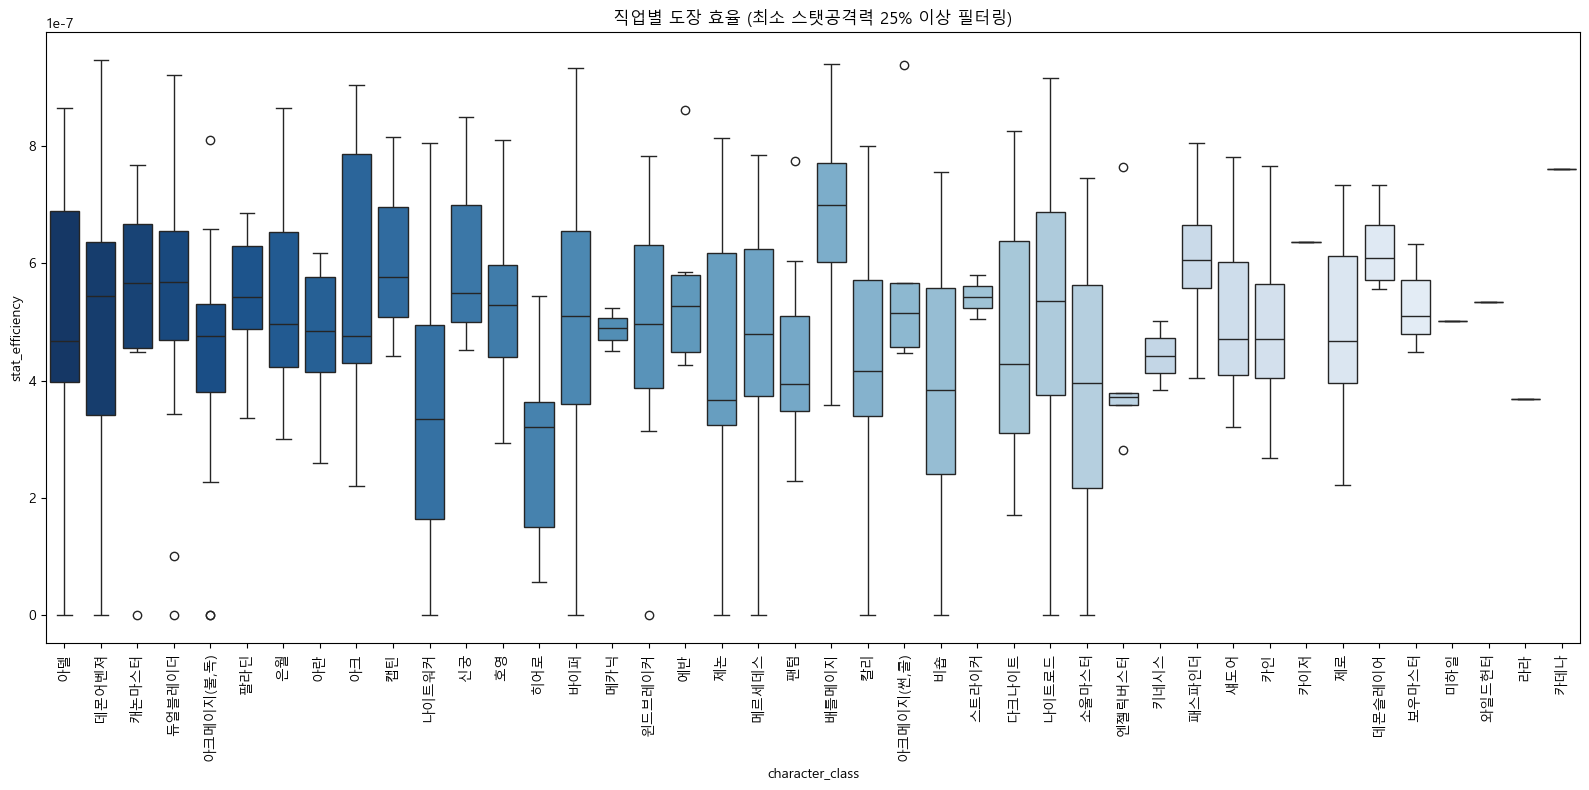

In [75]:
df_min_stat = df['ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†•'].quantile(0.25)

# 25% Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
df_filtered = df[df['ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†•']>= df_min_stat].copy()

df_filtered['stat_efficiency'] = df_filtered['dojang_best_floor'] / df_filtered['ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†•']

# ÏãúÍ∞ÅÌôî (ÏßÅÏóÖÎ≥Ñ boxplot)
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_filtered, x="character_class", y="stat_efficiency", palette='Blues_r')
plt.xticks(rotation=90)
plt.title("ÏßÅÏóÖÎ≥Ñ ÎèÑÏû• Ìö®Ïú® (ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†• 25% Ïù¥ÏÉÅ ÌïÑÌÑ∞ÎßÅ)")
plt.tight_layout()
plt.show()

## ‚úÖ ÏµúÏÜå Ïä§ÌÉØ Í≥µÍ≤©Î†• ÏÉÅÏúÑ 25% ÌïÑÌÑ∞ÎßÅ Í∏∞Î∞ò ÎèÑÏû• Ìö®Ïú® Î∂ÑÏÑù

ÏµúÏÜå Ïä§ÌÉØ Í≥µÍ≤©Î†•Ïù¥ Ï†ÑÏ≤¥ ÏÉÅÏúÑ 25% Ïù¥ÏÉÅÏù∏ Ï∫êÎ¶≠ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅÌïú ÌõÑ, Í∞Å ÏßÅÏóÖÎ≥Ñ ÎèÑÏû• Ìö®Ïú® (`stat_efficiency = ÎèÑÏû• ÏµúÍ≥†Ï∏µÏàò / ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†•`)ÏùÑ Î∂ÑÏÑùÌïú Í≤∞Í≥º.

---

### üìä 1. Î∞ïÏä§ÌîåÎ°Ø Ìï¥ÏÑù (ÏßÅÏóÖÎ≥Ñ Î∂ÑÌè¨ ÎπÑÍµê)

Î∞ïÏä§ÌîåÎ°ØÏùÄ Í∞Å ÏßÅÏóÖÏùò ÎèÑÏû• Ìö®Ïú® Î∂ÑÌè¨Î•º ÏãúÍ∞ÅÌôîÌïú Í≤É. Ï§ëÏïôÍ∞íÏù¥ ÎÜíÍ≥† Î∂ÑÌè¨Í∞Ä ÏïàÏ†ïÏ†ÅÏùºÏàòÎ°ù **<span style="color:orange">Ïä§ÌÉØ ÎåÄÎπÑ Ìö®Ïú®Ï†ÅÏù∏ ÏßÅÏóÖ</span>** Ïù¥Îùº Î≥º Ïàò ÏûàÏùå.

- **ÏÉÅÏúÑ Ìö®Ïú® ÏßÅÏóÖÍµ∞**
  - `Ïπ¥Îç∞ÎÇò`, `Î∞∞ÌãÄÎ©îÏù¥ÏßÄ`, `Ïπ¥Ïù¥Ï†Ä`, `Ïä¨Î†àÏù¥Ïñ¥`, `Ïã†Í∂Å`
  - Ï§ëÏïôÍ∞íÍ≥º ÏÉÅÏûê Î≤îÏúÑÍ∞Ä ÎÜíÍ≤å ÏúÑÏπòÌï® ‚Üí Ïä§ÌÉØ ÎåÄÎπÑ ÎèÑÏû• ÏÑ±Í≥º Ïö∞Ïàò

- **Ï§ëÍ∞Ñ Ìö®Ïú® ÏßÅÏóÖÍµ∞**
  - `ÎìÄÏñºÎ∏îÎ†àÏù¥Îçî`, `ÌåîÎùºÎîò`, `Ï†úÎÖº`, `ÏóêÎ∞ò`, `Ìå¨ÌÖÄ`, `Ïä§Ìä∏ÎùºÏù¥Ïª§` Îì±
  - Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÌèâÍ∑†Ï†ÅÏù¥ÎÇò, Î∂ÑÏÇ∞Ïù¥ ÌÅ∞ Í≤ΩÏö∞ÎèÑ ÏûàÏñ¥ Ìö®Ïú® Ìé∏Ï∞® Ï°¥Ïû¨

- **ÌïòÏúÑ Ìö®Ïú® ÏßÅÏóÖÍµ∞**
  - `ÌûàÏñ¥Î°ú`, `ÎÇòÏù¥Ìä∏ÏõåÏª§`, `ÎùºÎùº`, `ÎπÑÏàç`, `ÏπºÎ¶¨`
  - Ï§ëÏïôÍ∞íÏù¥ ÎÇÆÍ≥† Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ìö®Ïú®Ïù¥ ÎÇÆÏùÄ Í∞íÏóê Î™∞Î†§ ÏûàÏùå

---

C:\Users\user\AppData\Local\Temp\ipykernel_15652\3400845873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_efficiency.index, y=class_efficiency.values, palette='Blues_r')


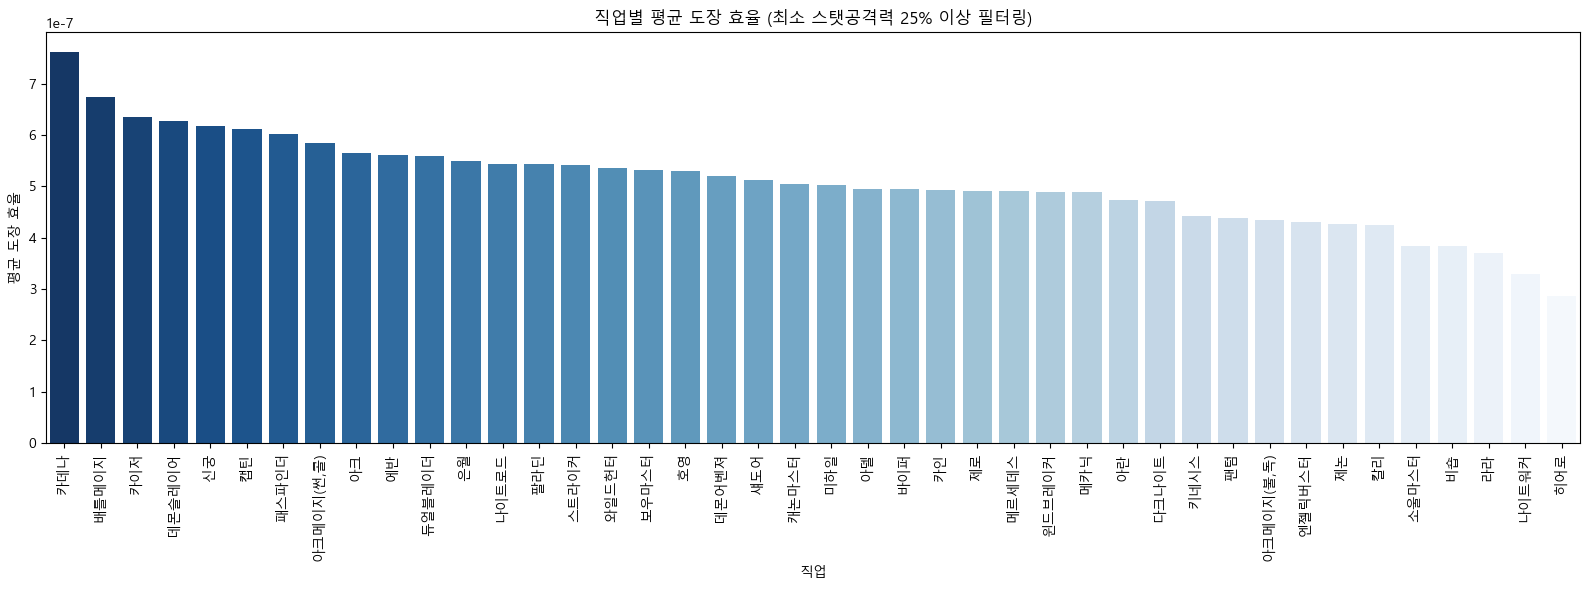

In [76]:
# ÏßÅÏóÖÎ≥Ñ ÌèâÍ∑† ÎèÑÏû• Ìö®Ïú® Í≥ÑÏÇ∞
class_efficiency = (
    df_filtered.groupby("character_class")["stat_efficiency"]
    .mean()
    .sort_values(ascending=False)
)

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 6))
sns.barplot(x=class_efficiency.index, y=class_efficiency.values, palette='Blues_r')
plt.xticks(rotation=90)
plt.title("ÏßÅÏóÖÎ≥Ñ ÌèâÍ∑† ÎèÑÏû• Ìö®Ïú® (ÏµúÏÜå Ïä§ÌÉØÍ≥µÍ≤©Î†• 25% Ïù¥ÏÉÅ ÌïÑÌÑ∞ÎßÅ)")
plt.ylabel("ÌèâÍ∑† ÎèÑÏû• Ìö®Ïú®")
plt.xlabel("ÏßÅÏóÖ")
plt.tight_layout()
plt.show()


### üìà 2. ÌèâÍ∑† ÎèÑÏû• Ìö®Ïú® Í∏∞Ï§Ä Ï†ïÎ†¨ (ÎßâÎåÄÍ∑∏ÎûòÌîÑ Ìï¥ÏÑù)

ÏßÅÏóÖÎ≥Ñ ÌèâÍ∑† ÎèÑÏû• Ìö®Ïú®ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨Ìïú Í≤∞Í≥º

- **Top 10 Ìö®Ïú® ÏßÅÏóÖ**
  1. `Ïπ¥Îç∞ÎÇò`
  2. `Î∞∞ÌãÄÎ©îÏù¥ÏßÄ`
  3. `Ïπ¥Ïù¥Ï†Ä`
  4. `Îç∞Î™¨Ïä¨Î†àÏù¥Ïñ¥`
  5. `Ïã†Í∂Å`
  6. `Ï∫°Ìã¥`
  7. `Ìå®Ïä§ÌååÏù∏Îçî`
  8. `ÏïÑÌÅ¨Î©îÏù¥ÏßÄ(Ïç¨,ÏΩú)`
  9. `ÏïÑÌÅ¨`
  10. `ÏóêÎ∞ò`

- **ÌïòÏúÑ ÏßÅÏóÖÍµ∞**
  - `ÌûàÏñ¥Î°ú`, `ÎÇòÏù¥Ìä∏ÏõåÏª§`, `ÎùºÎùº`, `ÎπÑÏàç`, `ÏπºÎ¶¨`, `ÏÜåÏö∏ÎßàÏä§ÌÑ∞`, `ÏóîÏ†§Î¶≠Î≤ÑÏä§ÌÑ∞` Îì±
  - Ìö®Ïú®Ïù¥ Ï†úÏùº Î≥ÑÎ°ú

---

### üìå ÏöîÏïΩ 

| Íµ¨Î∂Ñ       | ÏßÅÏóÖÍµ∞ ÏòàÏãú                              | ÌäπÏßï                                 |
|------------|-------------------------------------------|--------------------------------------|
| Í≥†Ìö®Ïú®     | Ïπ¥Îç∞ÎÇò, Î∞∞ÌãÄÎ©îÏù¥ÏßÄ, Ïπ¥Ïù¥Ï†Ä, Ïä¨Î†àÏù¥Ïñ¥, Ïã†Í∂Å | Ïä§ÌÉØ ÎåÄÎπÑ ÎèÑÏû• ÏÑ±Í≥º Îß§Ïö∞ Ïö∞Ïàò        |
| Ï§ëÍ∞ÑÌö®Ïú®   | Ï†úÎÖº, ÎìÄÎ∏î, ÌåîÎùºÎîò, Ìå¨ÌÖÄ, ÏóêÎ∞ò, Ïä§Ìä∏ÎùºÏù¥Ïª§ | Ïä§ÌÉØ ÎåÄÎπÑ ÏÑ±Í≥º ÌèâÍ∑†, Ìö®Ïú® Ìé∏Ï∞® Ï°¥Ïû¨ |
| Ï†ÄÌö®Ïú®     | ÌûàÏñ¥Î°ú, ÎÇòÏõå, ÎùºÎùº, ÎπÑÏàç, ÏπºÎ¶¨           | Ïä§ÌÉØÏù¥ ÎÜíÏïÑÎèÑ ÎèÑÏû• ÏÑ±Í≥º ÎÇÆÏùå        |

---